In [1]:
%matplotlib inline
import math
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns

from collections import defaultdict
from scipy.stats.stats import pearsonr

In [2]:
df = pd.read_csv('Train_HR_Employee_Attrition.csv')

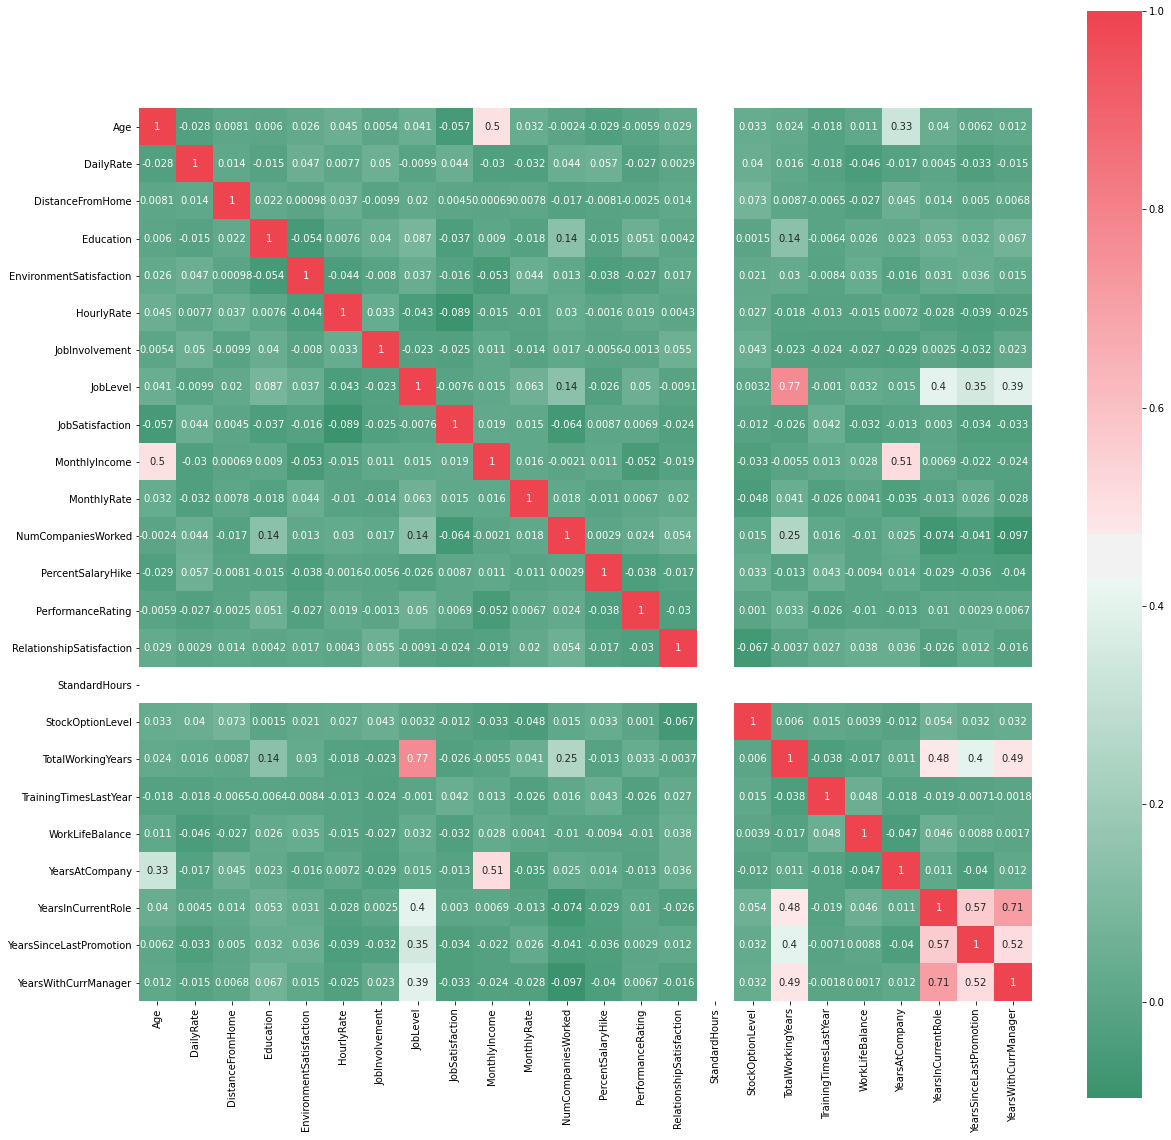

In [3]:
f, ax = plt.subplots(figsize=(20, 20))
corr = df.corr()
sns.heatmap(corr,mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(150, 10, s=80, l=55, n=9, as_cmap=True),square=True, ax=ax, annot = True)

In [4]:
#Elimino due colonne irrilevanti
df_dropped = df.drop(columns=['StandardHours','Over18'])

In [5]:
#Trasformazione in binari di tre attributi categorici 
df_dropped['Attrition'] = (df_dropped['Attrition'] == "Yes").astype(int)
df_dropped['OverTime'] = (df_dropped['OverTime'] == "Yes").astype(int)
df_dropped['Gender'] = (df_dropped['Gender'] == "Male").astype(int)

In [6]:
df_dropped[['Attrition', 'Gender', 'OverTime']].head()

,Attrition,Gender,OverTime
0,0,1,0
1,0,1,1
2,0,0,1
3,0,1,0
4,0,0,0


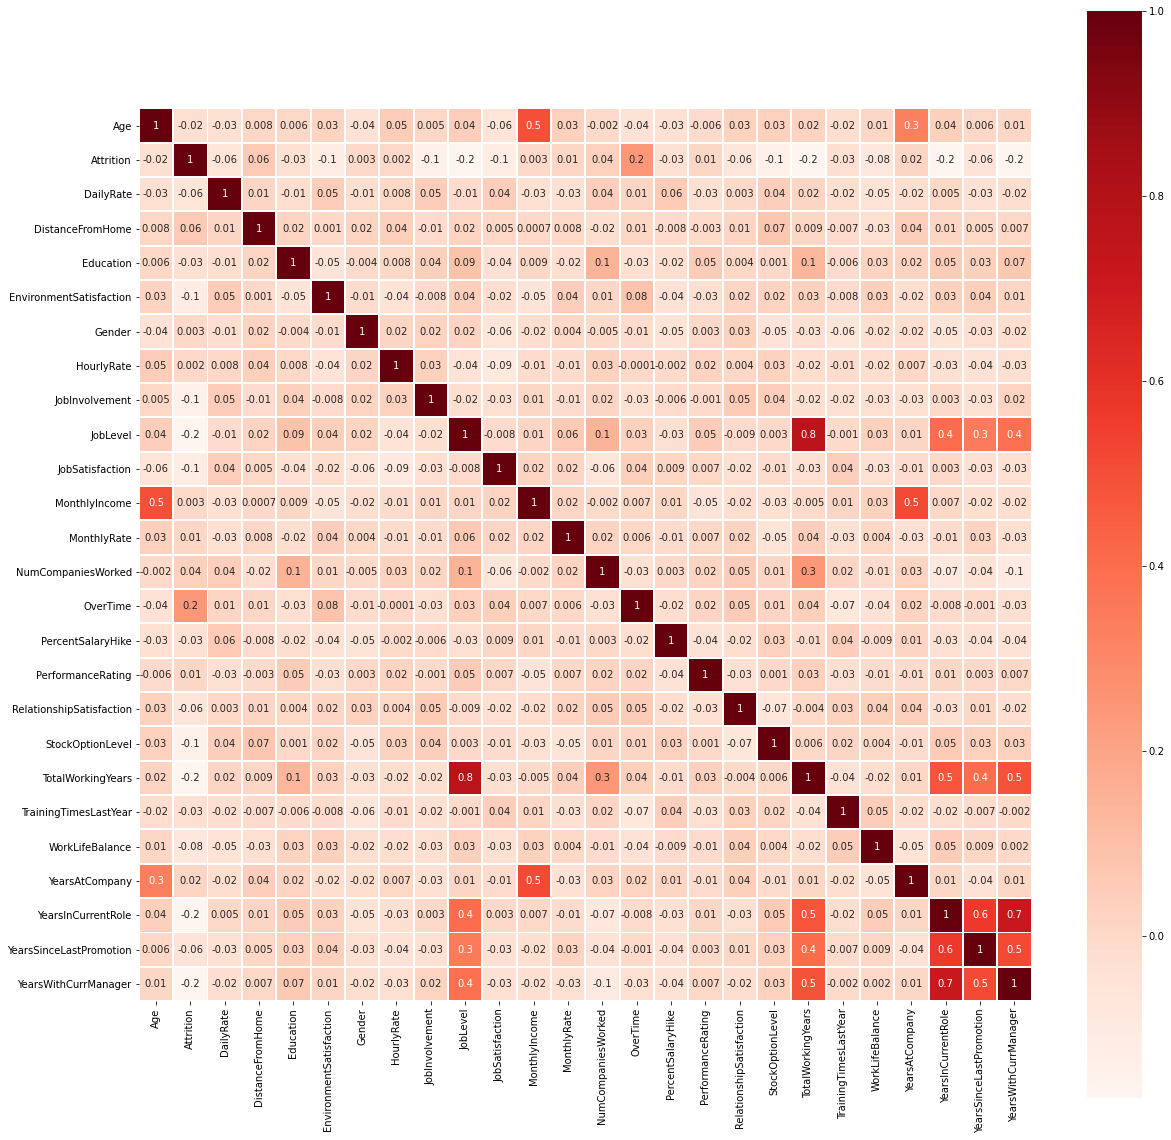

In [7]:
f, ax = plt.subplots(figsize=(20, 20))
corr = df_dropped.corr()
sns.heatmap(corr, cmap= 'Reds', linewidths=1, linecolor='white',square=True, fmt='.1g', ax=ax, annot = True)

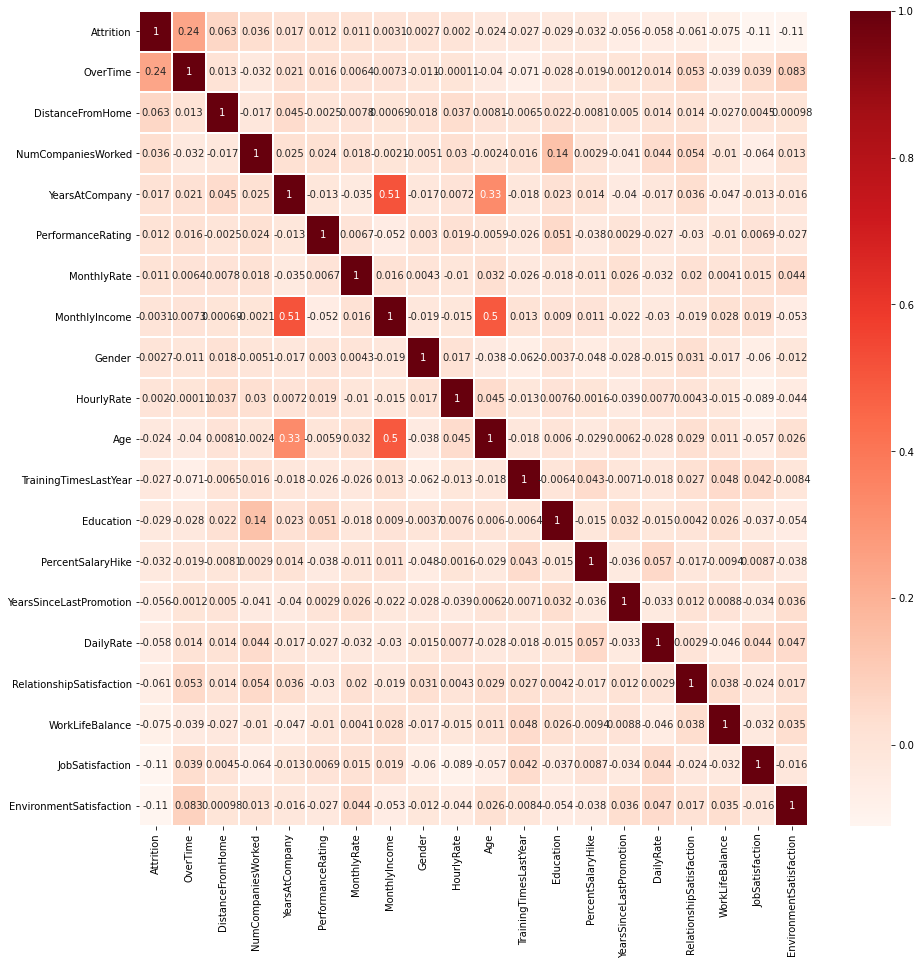

In [8]:
col = df_dropped.corr().nlargest(20, "Attrition").Attrition.index
plt.figure(figsize=(15, 15))
sns.heatmap(df_dropped[col].corr(), linewidths=1, linecolor='white', annot=True, cmap="Reds", annot_kws={"size":10})

In [9]:
#Trasformazione degli attributi categorici multivalore in nuovi attributi binari

multi_cols = ['BusinessTravel', 'Department', 'EducationField', 'JobRole', 'MaritalStatus']
df_MultiCols = pd.get_dummies(data = df_dropped,columns = multi_cols )

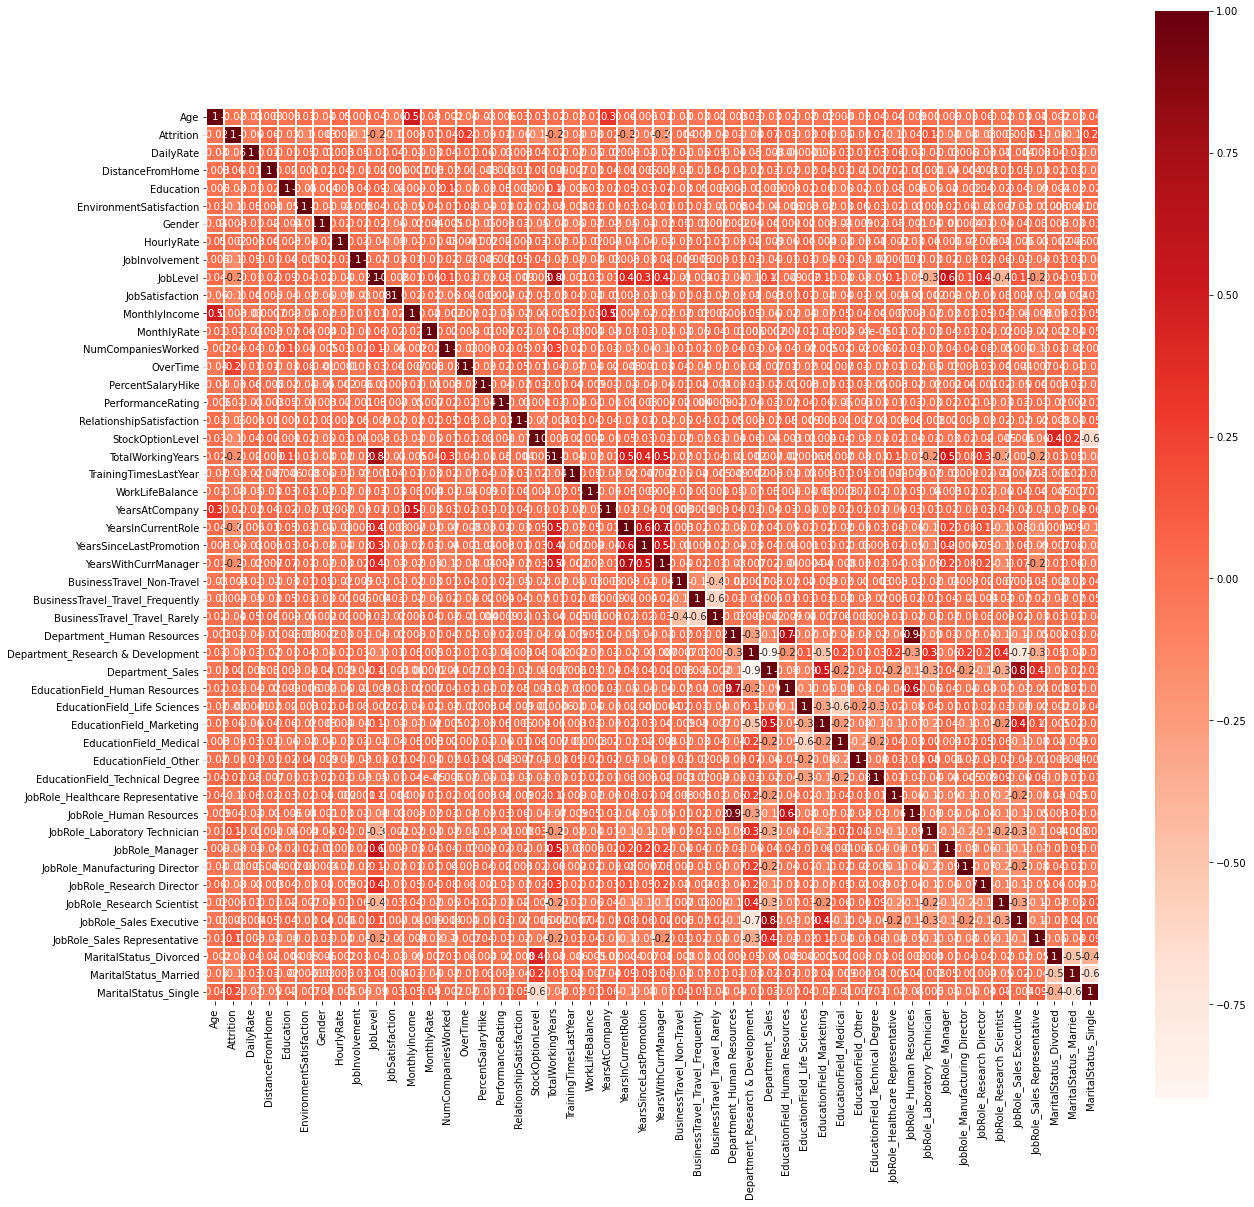

In [10]:
f, ax = plt.subplots(figsize=(20, 20))
corr = df_MultiCols.corr()
sns.heatmap(corr, cmap= 'Reds', linewidths=1, linecolor='white',square=True, fmt='.1g', ax=ax, annot = True)

In [11]:
def get_redundant_pairs(df_MultiCols):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df_MultiCols.columns
    for i in range(0, df_MultiCols.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df_MultiCols, n=5):
    au_corr = df_MultiCols.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df_MultiCols)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(df_MultiCols, 20))


Top Absolute Correlations
Department_Human Resources         JobRole_Human Resources           0.942007
Department_Research & Development  Department_Sales                  0.914831
Department_Sales                   JobRole_Sales Executive           0.802481
JobLevel                           TotalWorkingYears                 0.774492
Department_Research & Development  JobRole_Sales Executive           0.734135
YearsInCurrentRole                 YearsWithCurrManager              0.710746
Department_Human Resources         EducationField_Human Resources    0.668312
MaritalStatus_Married              MaritalStatus_Single              0.642566
StockOptionLevel                   MaritalStatus_Single              0.639549
EducationField_Human Resources     JobRole_Human Resources           0.604443
BusinessTravel_Travel_Frequently   BusinessTravel_Travel_Rarely      0.601521
JobLevel                           JobRole_Manager                   0.572418
EducationField_Life Sciences       Edu

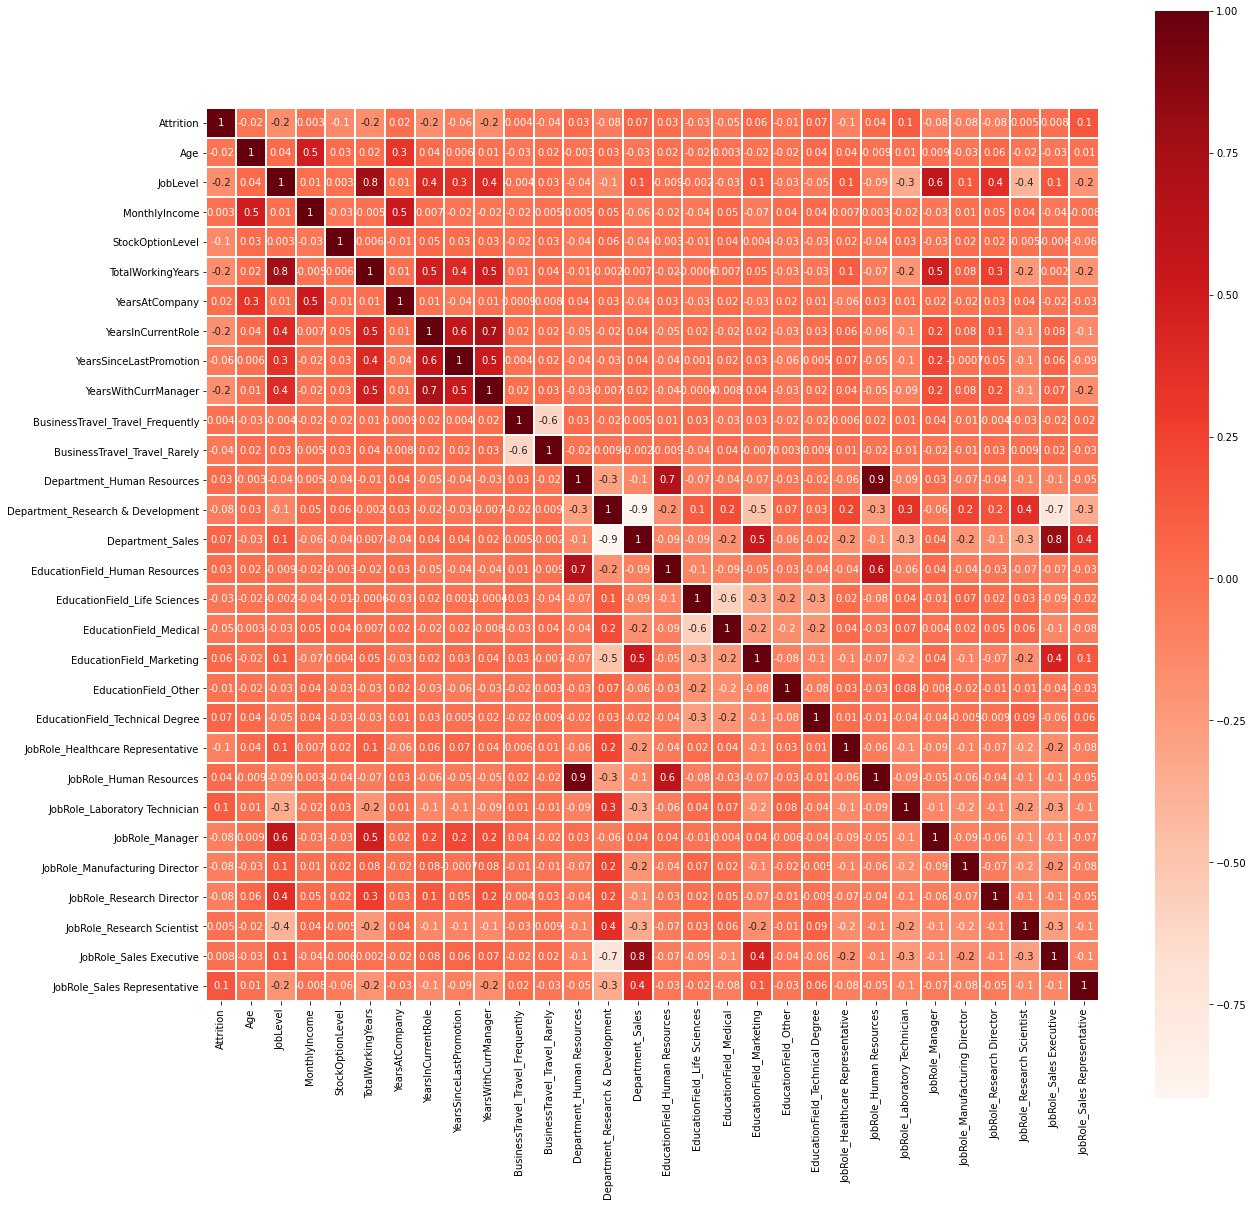

In [12]:
col = ["Attrition","Age", "JobLevel", "MonthlyIncome", "StockOptionLevel", "TotalWorkingYears", "YearsAtCompany", 
        "YearsInCurrentRole", "YearsSinceLastPromotion", "YearsWithCurrManager","BusinessTravel_Travel_Frequently", 
        "BusinessTravel_Travel_Rarely", "Department_Human Resources", "Department_Research & Development", 
        "Department_Sales", "EducationField_Human Resources", "EducationField_Life Sciences", "EducationField_Medical", 
        "EducationField_Marketing", "EducationField_Other", "EducationField_Technical Degree",
        "JobRole_Healthcare Representative", "JobRole_Human Resources", "JobRole_Laboratory Technician",
        "JobRole_Manager", "JobRole_Manufacturing Director", "JobRole_Research Director", 
        "JobRole_Research Scientist","JobRole_Sales Executive","JobRole_Sales Representative"]

f, ax = plt.subplots(figsize=(20, 20))
corr = df_MultiCols[col].corr()
sns.heatmap(corr,mask=np.zeros_like(corr, dtype=np.bool), cmap= 'Reds', linewidths=1, linecolor='white',square=True, fmt='.1g', ax=ax, annot = True)

In [13]:
# Threshold for removing correlated variables
threshold = 0.8

# Absolute value correlation matrix
corr_matrix = df_MultiCols.corr().abs()
corr_matrix.head()

# Upper triangle of correlations
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
upper.head()

# Select columns with correlations above threshold
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]

print('There are %d columns to remove :' % (len(to_drop)))

#data = data.drop(columns = to_drop)

to_drop

There are 3 columns to remove :


['Department_Sales', 'JobRole_Human Resources', 'JobRole_Sales Executive']

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 <a list of 9 Text major ticklabel objects>)

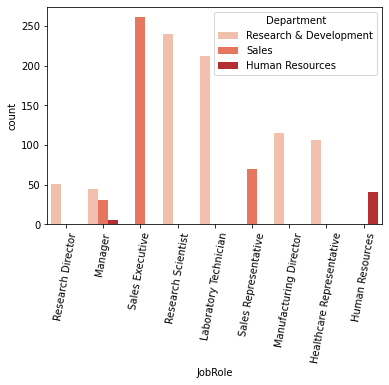

In [14]:
sns.countplot(data=df, x='JobRole', hue='Department', palette="Reds")
plt.xticks(rotation=80)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 <a list of 9 Text major ticklabel objects>)

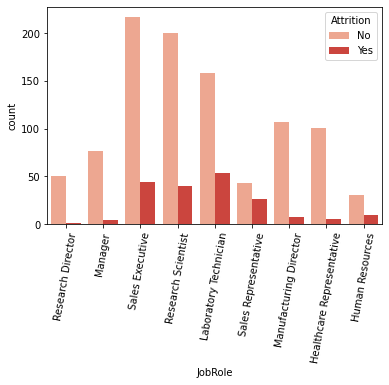

In [15]:
sns.countplot(data=df, x='JobRole', hue='Attrition', palette="Reds")
plt.xticks(rotation=80)

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

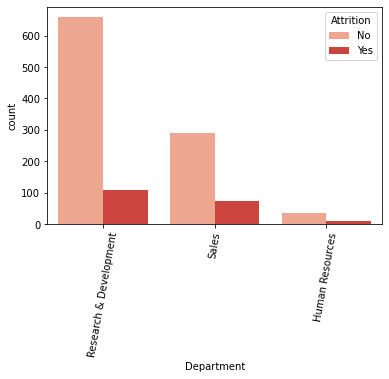

In [16]:
sns.countplot(data=df, x='Department', hue='Attrition', palette="Reds")
plt.xticks(rotation=80)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38]),
 <a list of 39 Text major ticklabel objects>)

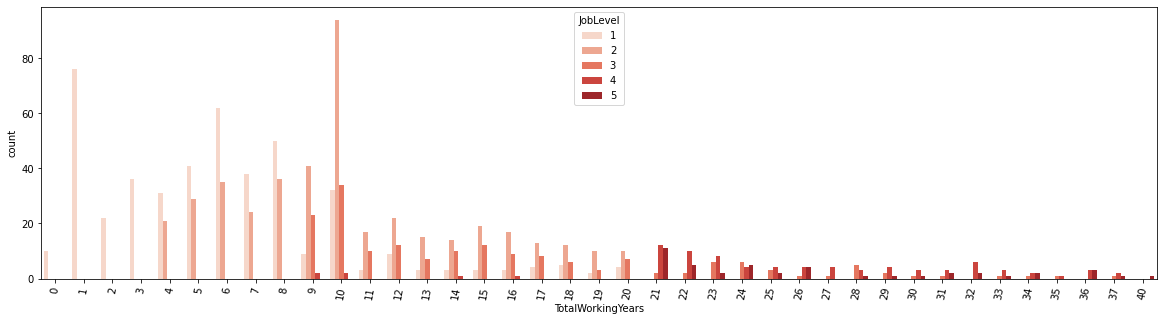

In [17]:
f, ax = plt.subplots(figsize=(20, 5))
sns.countplot(data=df, x='TotalWorkingYears', hue='JobLevel', palette="Reds", ax = ax)
plt.xticks(rotation=80)

In [18]:
############################## SCRIPT ##############################
for i, row in df.iterrows():
    ifor_val = ''
    if row['JobRole'] == 'Manager':
        if row['Department'] == 'Sales':
            df.loc[i, 'JobRole'] = 'Manager Sales'
        if row['Department'] == 'Human Resources':
            df.loc[i, 'JobRole'] =  'Manager HR'
        if row['Department'] == 'Research & Development':
            df.loc[i, 'JobRole'] =  'Manager R&D'
            
df.drop('Department', axis=1, inplace=True)

#######################################################################